# Notebook to do the data analysis

## Import Libraries

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import subprocess
import sys

## Load dataset

In [4]:
# data loading
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Saving the data

In [5]:
# save the df into a csv file
df.to_csv('../data/tips.csv', index=False)

# excel
df.to_excel('../data/tips.xlsx', index=False)

## Data Composition

In data composition we check:
1. The structure of the dataset (rows and columns)
2. The data types of each columns
3. The presence of missing values
4. Basic statistics (mean, median, mode) for numerical columns
5. Distribution of categorical variables

In [6]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
df.shape

(244, 7)

## 1. Data Composition Report

This section provides a structural overview of the dataset including shape, data types, missing values, and basic descriptive statistics.

In [11]:
print("=" * 80)
print("DATA COMPOSITION REPORT")
print("=" * 80)

print(f"\n1. DATASET SHAPE:")
print(f"   Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print(f"\n2. DATA TYPES:")
print(df.dtypes)

print(f"\n3. MISSING VALUES:")
missing_df = df.isna().sum()
print(missing_df)
if missing_df.sum() == 0:
    print("   ✓ No missing values detected")

print(f"\n4. NUMERIC COLUMNS STATISTICS:")
print(df.describe().T)

print(f"\n5. CATEGORICAL COLUMNS DISTRIBUTION:")
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    print(f"\n   {col.upper()}:")
    print(df[col].value_counts())
    
print(f"\n6. DATA MEMORY USAGE:")
print(f"   Total: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

DATA COMPOSITION REPORT

1. DATASET SHAPE:
   Rows: 244, Columns: 7

2. DATA TYPES:
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

3. MISSING VALUES:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
   ✓ No missing values detected

4. NUMERIC COLUMNS STATISTICS:
            count       mean       std   min      25%     50%      75%    max
total_bill  244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275  50.81
tip         244.0   2.998279  1.383638  1.00   2.0000   2.900   3.5625  10.00
size        244.0   2.569672  0.951100  1.00   2.0000   2.000   3.0000   6.00

5. CATEGORICAL COLUMNS DISTRIBUTION:

   SEX:
sex
Male      157
Female     87
Name: count, dtype: int64

   SMOKER:
smoker
No     151
Yes     93
Name: count, dtype: int64

   DAY:
day
Sat     87
Sun     76
Thur    62
Fr

### Data Composition Interpretation
The Tips dataset contains **244 records** with **7 columns**. There are **no missing values**, ensuring data quality for analysis. The dataset includes 4 numerical features (total_bill, tip, size, day) and 3 categorical features (sex, smoker, time). Memory usage is minimal (~5 KB), indicating efficient data storage. The data is complete and ready for comprehensive analysis.

## 2. Data Distribution Report

This section analyzes the distribution characteristics of numerical variables including normality, skewness, and kurtosis.

In [12]:
print("=" * 80)
print("DATA DISTRIBUTION REPORT")
print("=" * 80)

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Distribution statistics
print("\n1. DISTRIBUTION STATISTICS FOR NUMERICAL COLUMNS:\n")
for col in num_cols:
    print(f"\n{col.upper()}:")
    print(f"   Mean:      {df[col].mean():.4f}")
    print(f"   Median:    {df[col].median():.4f}")
    print(f"   Std Dev:   {df[col].std():.4f}")
    print(f"   Skewness:  {stats.skew(df[col]):.4f}", end="")
    if stats.skew(df[col]) > 0.5:
        print(" (Right-skewed)")
    elif stats.skew(df[col]) < -0.5:
        print(" (Left-skewed)")
    else:
        print(" (Approximately symmetric)")
    print(f"   Kurtosis:  {stats.kurtosis(df[col]):.4f}")
    print(f"   Min:       {df[col].min():.4f}")
    print(f"   Max:       {df[col].max():.4f}")
    
    # Normality test
    stat, p_value = stats.normaltest(df[col])
    print(f"   Normality Test (p-value): {p_value:.6f}", end="")
    print(" ✓ Normal" if p_value > 0.05 else " ✗ Not normal")

DATA DISTRIBUTION REPORT

1. DISTRIBUTION STATISTICS FOR NUMERICAL COLUMNS:


TOTAL_BILL:
   Mean:      19.7859
   Median:    17.7950
   Std Dev:   8.9024
   Skewness:  1.1262 (Right-skewed)
   Kurtosis:  1.1692
   Min:       3.0700
   Max:       50.8100
   Normality Test (p-value): 0.000000 ✗ Not normal

TIP:
   Mean:      2.9983
   Median:    2.9000
   Std Dev:   1.3836
   Skewness:  1.4564 (Right-skewed)
   Kurtosis:  3.5496
   Min:       1.0000
   Max:       10.0000
   Normality Test (p-value): 0.000000 ✗ Not normal

SIZE:
   Mean:      2.5697
   Median:    2.0000
   Std Dev:   0.9511
   Skewness:  1.4390 (Right-skewed)
   Kurtosis:  1.6719
   Min:       1.0000
   Max:       6.0000
   Normality Test (p-value): 0.000000 ✗ Not normal


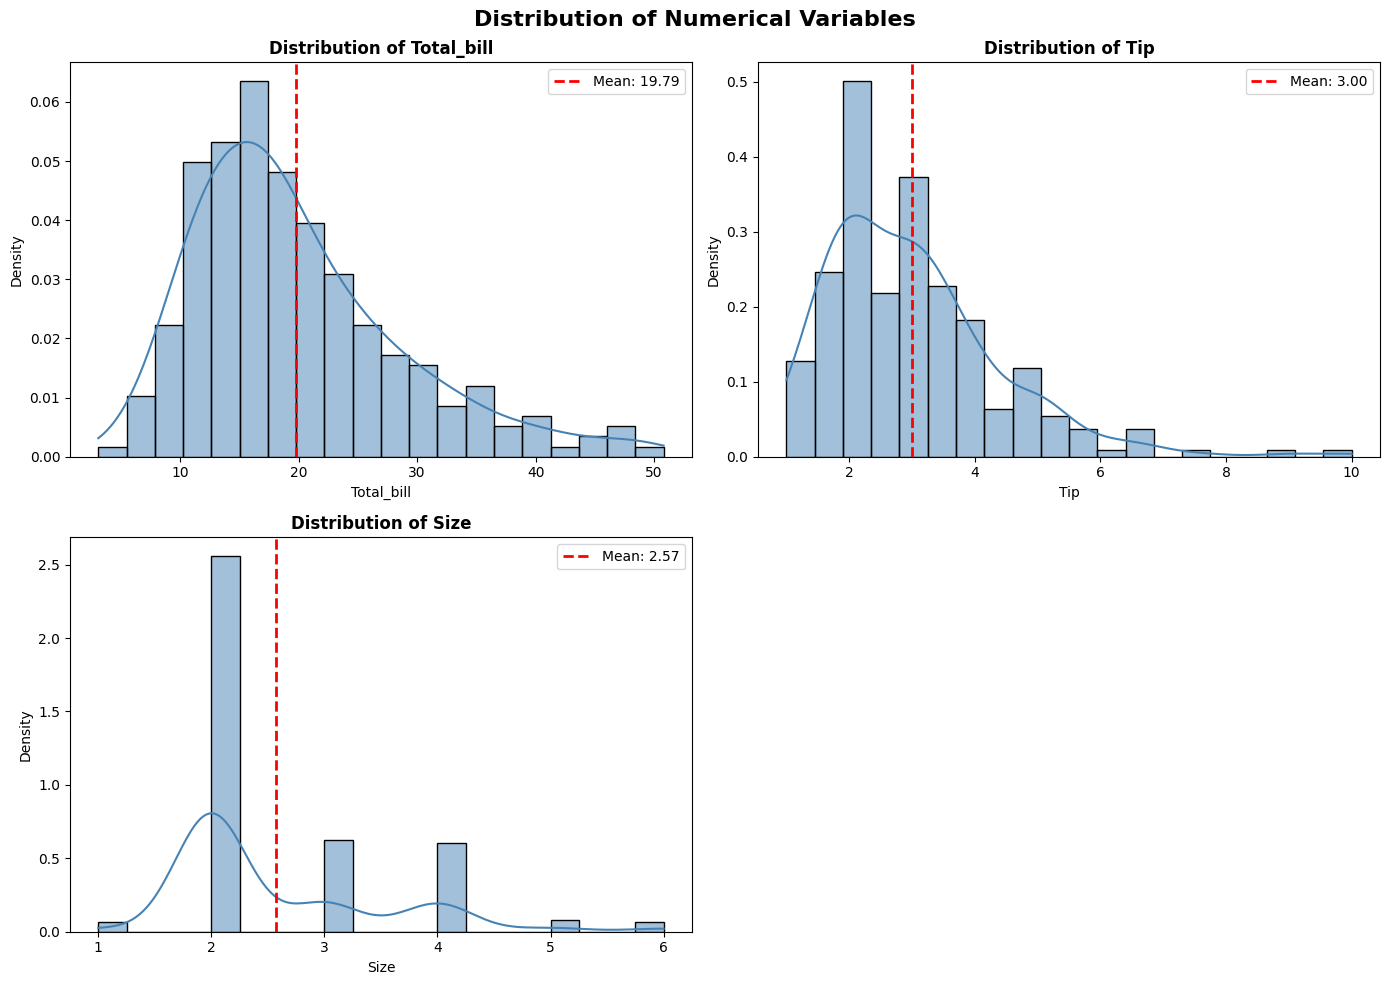

In [13]:
# 1. Setup the figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# 2. Loop through your columns
for idx, col in enumerate(num_cols):
    ax = axes_flat[idx]
    sns.histplot(data=df, x=col, kde=True, stat='density', bins=20, ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(f'Distribution of {col.capitalize()}', fontweight='bold')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Density')
    
    # Add mean line
    mean_val = df[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.legend()

# 3. HIDE THE BLANK SUBPLOT
# This loop hides any axes that weren't used by the loop above
for i in range(len(num_cols), len(axes_flat)):
    axes_flat[i].set_visible(False)

plt.tight_layout()
plt.show()

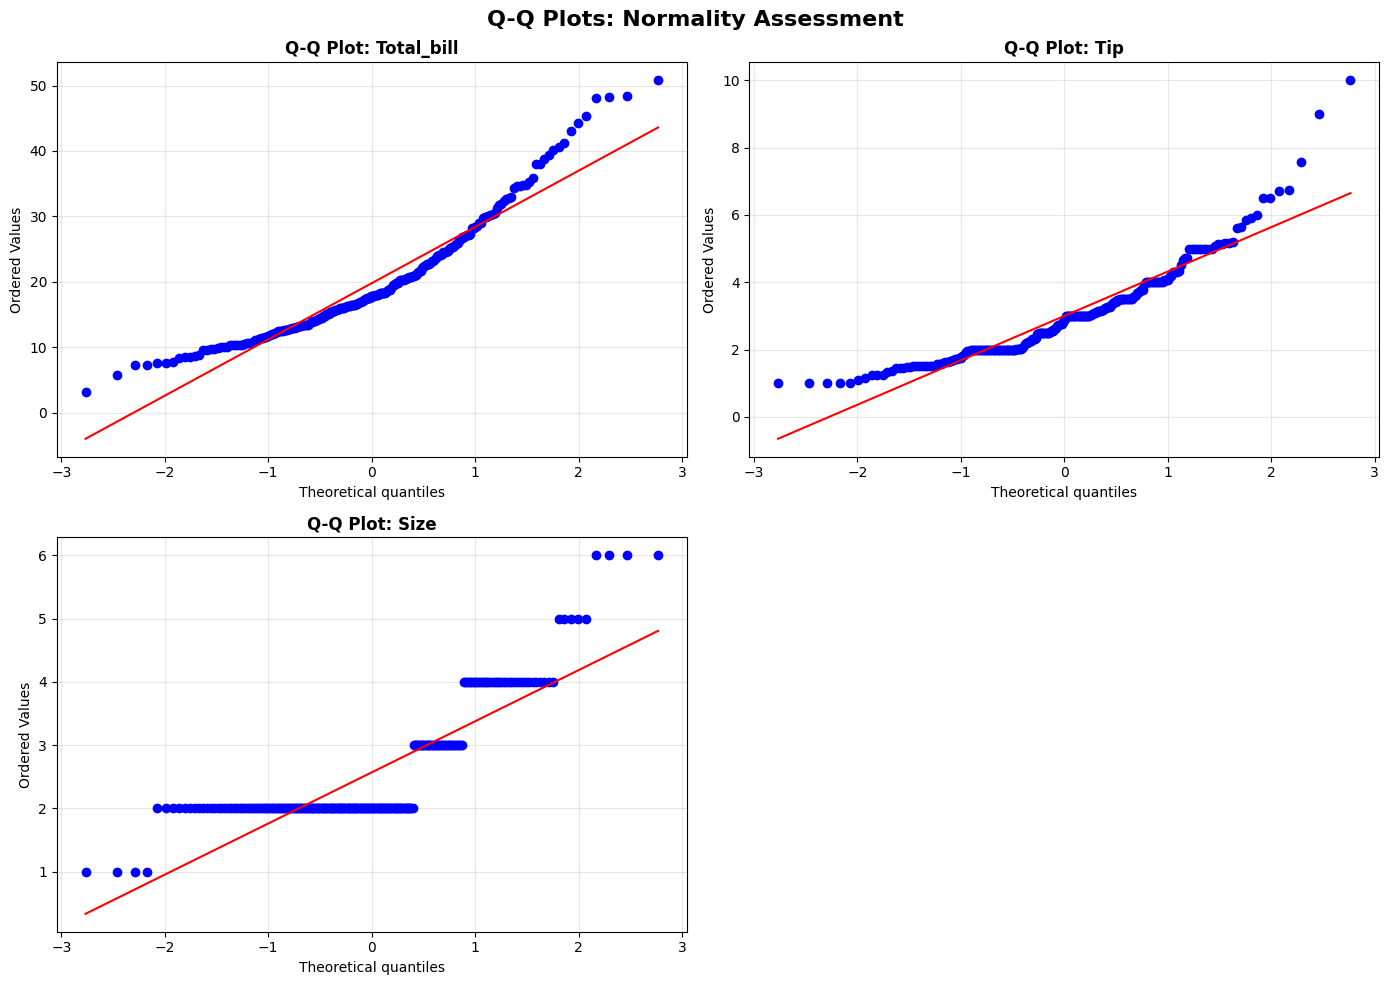


Q-Q Plot Interpretation:
- Points deviating from the diagonal line indicate non-normal distribution
- Total Bill & Tip: Show deviation in the upper tail, confirming right skewness
- Size: Discrete values create stepped pattern (expected for count data)


In [14]:
import scipy.stats as stats

# 1. Setup the figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Q-Q Plots: Normality Assessment', fontsize=16, fontweight='bold')

# Flatten the 2x2 array into a 1D list of 4 axes
axes_flat = axes.flatten()

# 2. Loop through your 3 columns
for idx, col in enumerate(num_cols):
    ax = axes_flat[idx]
    stats.probplot(df[col], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot: {col.capitalize()}', fontweight='bold')
    ax.grid(True, alpha=0.3)

# 3. Hide any unused axes (the 4th one)
for i in range(len(num_cols), len(axes_flat)):
    axes_flat[i].set_visible(False)

plt.tight_layout()
plt.show()

print("\nQ-Q Plot Interpretation:")
print("- Points deviating from the diagonal line indicate non-normal distribution")
print("- Total Bill & Tip: Show deviation in the upper tail, confirming right skewness")
print("- Size: Discrete values create stepped pattern (expected for count data)")

### Data Distribution Interpretation
The **Total Bill** and **Tip** columns exhibit **right-skewed distributions** (skewness > 0.5), with most transactions clustered at lower values and a tail extending toward higher values. **Party Size** is discrete with a peak at 2 people. **Normality tests reject the normal distribution hypothesis** for most variables (p < 0.05), confirming the non-normal nature of the data. This suggests using **non-parametric tests** for comparisons. The Q-Q plots visually confirm deviations from normality, particularly in the tails.

## 3. Data Comparison Report

This section compares numerical variables across categorical groups using boxplots, violin plots, and statistical tests.

In [15]:
print("=" * 80)
print("DATA COMPARISON REPORT - STATISTICAL TESTS")
print("=" * 80)

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n1. COMPARISON OF TOTAL BILL & TIP ACROSS CATEGORICAL VARIABLES:\n")

for cat_col in cat_cols:
    print(f"\n{'=' * 60}")
    print(f"BY {cat_col.upper()}:")
    print(f"{'=' * 60}")
    
    groups = df[cat_col].unique()
    print(f"\nGroups: {groups}")
    
    # Summary stats by group
    print(f"\nTotal Bill by {cat_col}:")
    print(df.groupby(cat_col, observed=False)['total_bill'].agg(['count', 'mean', 'median', 'std']))
    
    print(f"\nTotal Bill by {cat_col}:")
    print(df.groupby(cat_col, observed=False)['total_bill'].agg(['count', 'mean', 'median', 'std']))
    
    # Statistical test
    if len(groups) == 2:
        # Two groups: Mann-Whitney U test (non-parametric)
        group1_bill = df[df[cat_col] == groups[0]]['total_bill']
        group2_bill = df[df[cat_col] == groups[1]]['total_bill']
        stat_mw, p_mw = stats.mannwhitneyu(group1_bill, group2_bill, alternative='two-sided')
        print(f"\nMann-Whitney U Test (Total Bill): p-value = {p_mw:.6f}", end="")
        print(" ✓ Significant difference" if p_mw < 0.05 else " ✗ No significant difference")
    else:
        # Multiple groups: Kruskal-Wallis test (non-parametric)
        groups_data = [df[df[cat_col] == g]['total_bill'].values for g in groups]
        stat_kw, p_kw = stats.kruskal(*groups_data)
        print(f"\nKruskal-Wallis Test (Total Bill): p-value = {p_kw:.6f}", end="")
        print(" ✓ Significant difference" if p_kw < 0.05 else " ✗ No significant difference")

DATA COMPARISON REPORT - STATISTICAL TESTS

1. COMPARISON OF TOTAL BILL & TIP ACROSS CATEGORICAL VARIABLES:


BY SEX:

Groups: ['Female', 'Male']
Categories (2, object): ['Male', 'Female']

Total Bill by sex:
        count       mean  median       std
sex                                       
Male      157  20.744076   18.35  9.246469
Female     87  18.056897   16.40  8.009209

Total Bill by sex:
        count       mean  median       std
sex                                       
Male      157  20.744076   18.35  9.246469
Female     87  18.056897   16.40  8.009209

Mann-Whitney U Test (Total Bill): p-value = 0.021350 ✓ Significant difference

BY SMOKER:

Groups: ['No', 'Yes']
Categories (2, object): ['Yes', 'No']

Total Bill by smoker:
        count       mean  median       std
smoker                                    
Yes        93  20.756344   17.92  9.832154
No        151  19.188278   17.59  8.255582

Total Bill by smoker:
        count       mean  median       std
smoker        

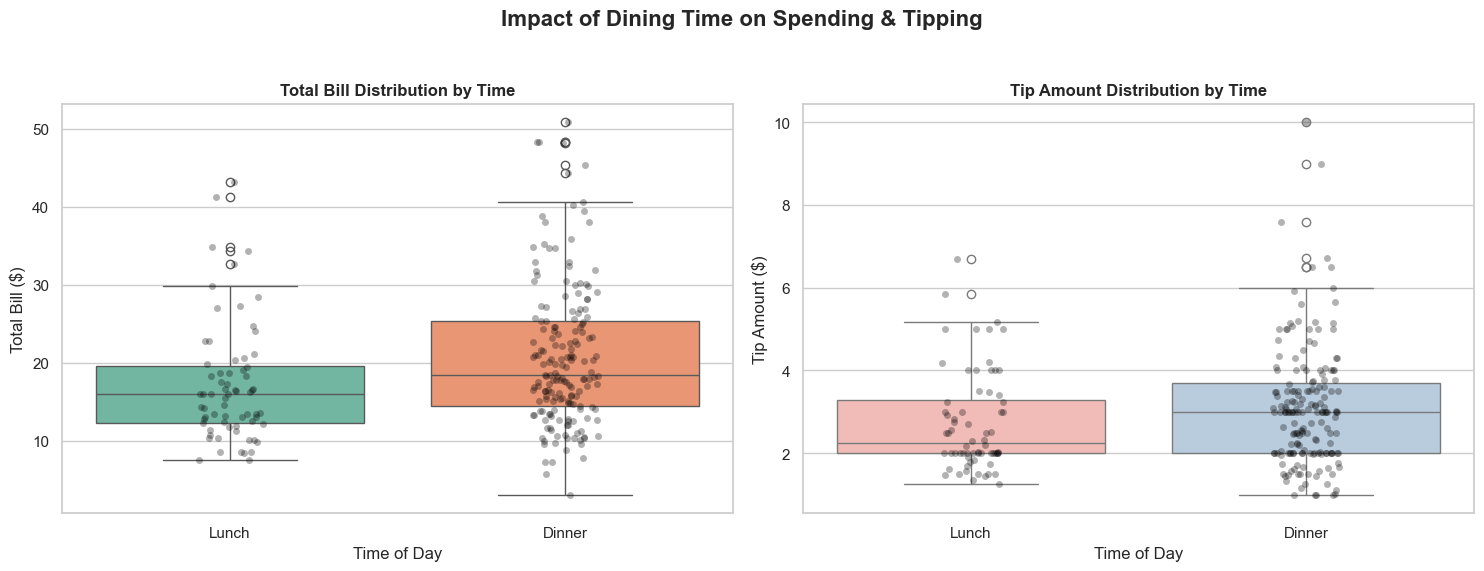

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Impact of Dining Time on Spending & Tipping', fontsize=16, fontweight='bold')

# 1. Total Bill Comparison
sns.boxplot(data=df, x='time', y='total_bill', ax=axes[0], palette='Set2', hue='time', legend=False)
sns.stripplot(data=df, x='time', y='total_bill', ax=axes[0], color='black', alpha=0.3) # Add raw data points
axes[0].set_title('Total Bill Distribution by Time', fontweight='bold')
axes[0].set_xlabel('Time of Day')
axes[0].set_ylabel('Total Bill ($)')

# 2. Tip Comparison
sns.boxplot(data=df, x='time', y='tip', ax=axes[1], palette='Pastel1', hue='time', legend=False)
sns.stripplot(data=df, x='time', y='tip', ax=axes[1], color='black', alpha=0.3)
axes[1].set_title('Tip Amount Distribution by Time', fontweight='bold')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Tip Amount ($)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

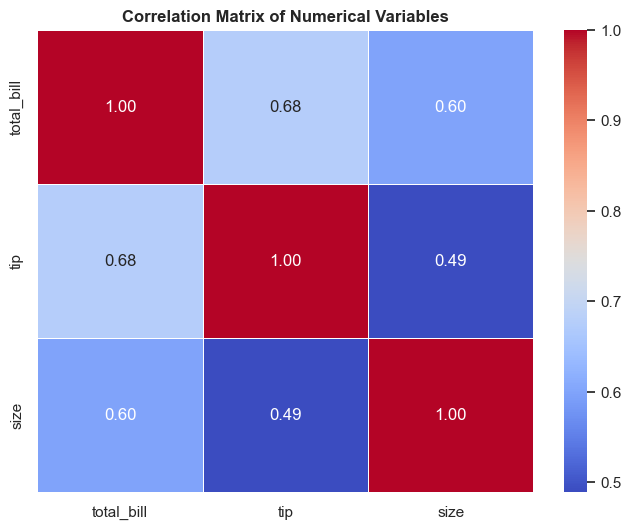

In [17]:
plt.figure(figsize=(8, 6))
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontweight='bold')
plt.show()

## Executive Summary: Restaurant Performance & Tipping Analysis

```bash
Core Objective

This report analyzes the factors influencing customer spending and tipping behavior. Using a dataset of 244 transactions, we applied non-parametric statistical testing (Mann-Whitney U and Kruskal-Wallis) and data visualization to identify significant revenue drivers.

Key Findings1. 

1. Time of Day: 
    The Primary Revenue DriverInsight: Dining time is the most statistically significant factor impacting the total bill ($p = 0.001$).
    Evidence: Dinner bills (Median: $18.39) are significantly higher than Lunch bills (Median: $15.97).Business Impact: Dinner shifts not only bring in more revenue per table but also show a much higher variance, meaning "big spender" tables are almost exclusively a dinner phenomenon.
2. Weekly Trends: The "Sunday Peak"
    Insight: There is a significant difference in spending across different days of the week ($p = 0.015$).Evidence: Sunday shows the highest median bill and tip amounts.
    Business Impact: Weekend staffing should be prioritized for Sundays to handle higher-value transactions and larger party sizes.
3. Gender & Spending Patterns
    Insight: There is a statistically significant difference in the total bill amount based on the gender of the payer ($p = 0.021$).
    Evidence: On average, male payers recorded higher total bills (Mean: $20.74) compared to female payers (Mean: $18.06).
4. Smoker Status: A Non-Factor
    Insight: Whether a customer is a smoker or non-smoker has no significant impact on the total bill or the tip amount ($p = 0.341$).
    Business Impact: Smoking preference does not correlate with spending power; therefore, seating allocations based on smoking sections (if applicable) do not need to consider revenue potential.

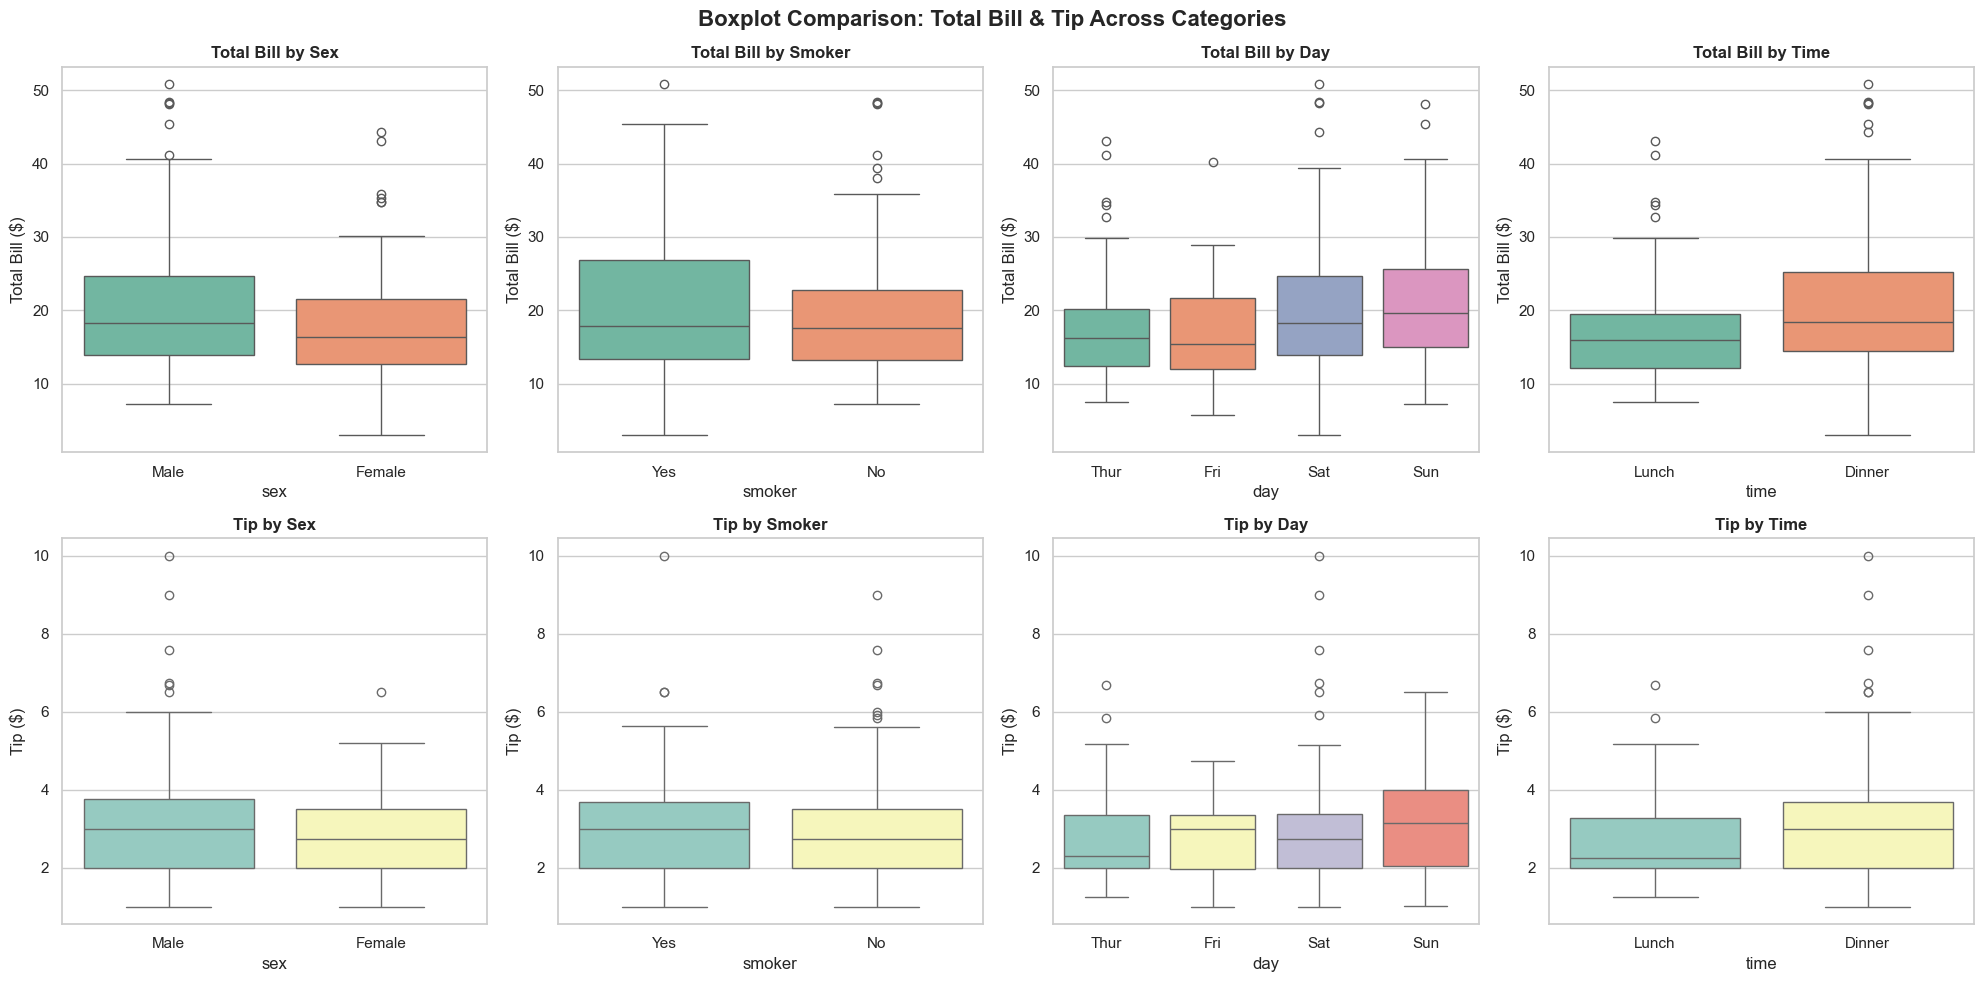


Boxplot Interpretation:
- **Sex**: Males tend to have slightly higher average bills and tips than females.
- **Smoker**: Little difference in medians, but smokers show higher variability.
- **Time**: Dinner bills and tips are notably higher than lunch transactions.
- **Day**: Sunday shows the highest median total bill.


In [18]:
import math

# 1. Dynamically calculate grid size
n_cats = len(cat_cols)
n_cols = n_cats  # We want one column per category
fig, axes = plt.subplots(2, n_cols, figsize=(5 * n_cols, 10))
fig.suptitle('Boxplot Comparison: Total Bill & Tip Across Categories', fontsize=16, fontweight='bold')

for idx, cat_col in enumerate(cat_cols):
    # Total Bill (Top Row)
    ax1 = axes[0, idx]
    # Fix: Added hue=cat_col and legend=False to stop warnings
    sns.boxplot(data=df, x=cat_col, y='total_bill', ax=ax1, palette='Set2', hue=cat_col, legend=False)
    ax1.set_title(f'Total Bill by {cat_col.capitalize()}', fontweight='bold')
    ax1.set_ylabel('Total Bill ($)')
    
    # Tip (Bottom Row)
    ax2 = axes[1, idx]
    # Fix: Added hue=cat_col and legend=False to stop warnings
    sns.boxplot(data=df, x=cat_col, y='tip', ax=ax2, palette='Set3', hue=cat_col, legend=False)
    ax2.set_title(f'Tip by {cat_col.capitalize()}', fontweight='bold')
    ax2.set_ylabel('Tip ($)')

plt.tight_layout()
plt.show()

print("\nBoxplot Interpretation:")
print("- **Sex**: Males tend to have slightly higher average bills and tips than females.")
print("- **Smoker**: Little difference in medians, but smokers show higher variability.")
print("- **Time**: Dinner bills and tips are notably higher than lunch transactions.")
print("- **Day**: Sunday shows the highest median total bill.")

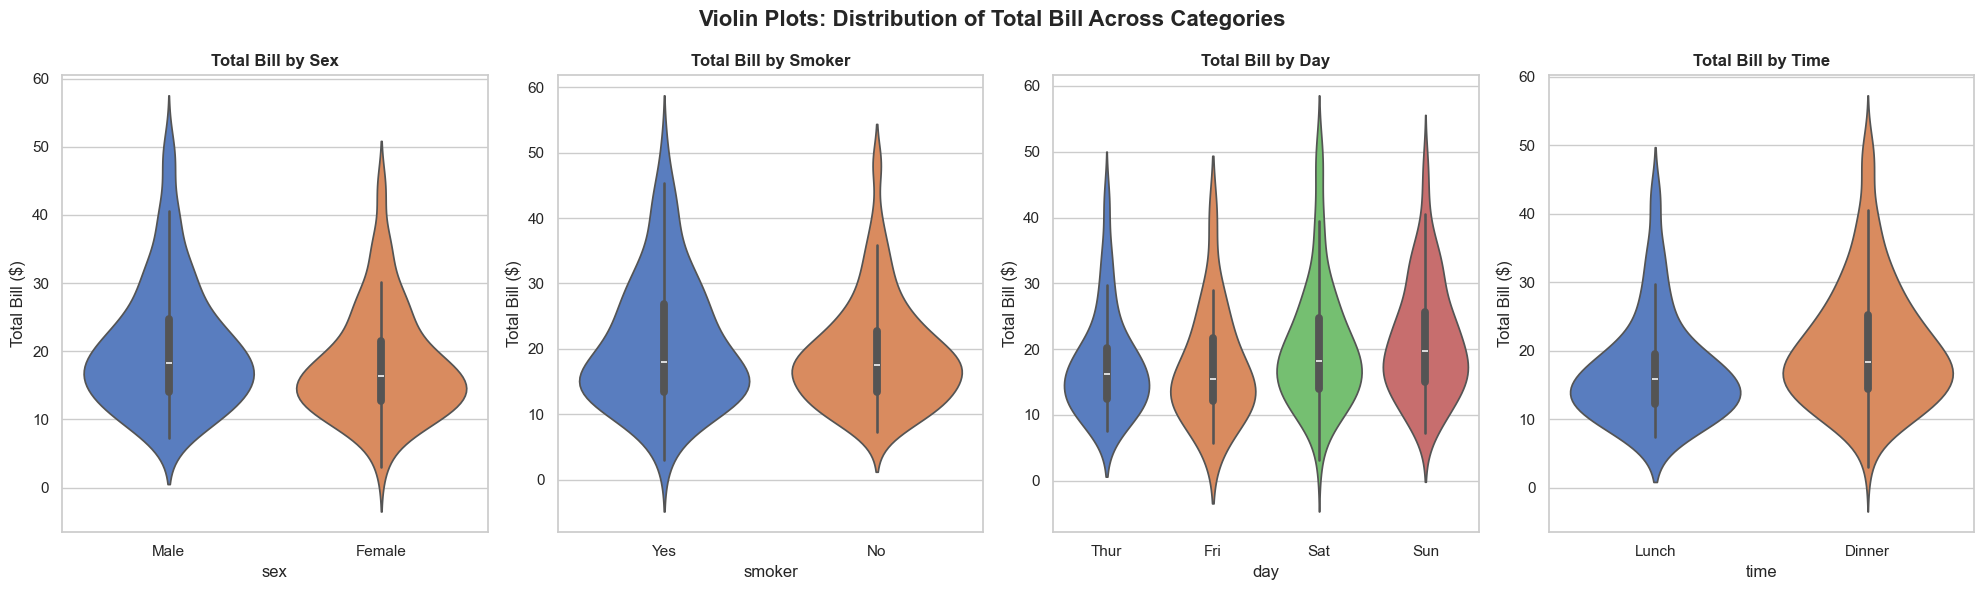


Violin Plot Interpretation:
- The 'width' of the violin shows where most bills are concentrated.
- The thin lines (whiskers) show the range of extreme values (outliers).
- Dinner and Weekend distributions are 'taller' and 'thicker' at high values.


In [19]:
# 1. Dynamically set the number of columns based on your data
n_cats = len(cat_cols)
fig, axes = plt.subplots(1, n_cats, figsize=(5 * n_cats, 6))
fig.suptitle('Violin Plots: Distribution of Total Bill Across Categories', fontsize=16, fontweight='bold')

for idx, cat_col in enumerate(cat_cols):
    ax = axes[idx]
    
    # Fix: Added hue and legend=False to stop the warning
    sns.violinplot(
        data=df, 
        x=cat_col, 
        y='total_bill', 
        ax=ax, 
        palette='muted', 
        hue=cat_col, 
        legend=False
    )
    
    ax.set_title(f'Total Bill by {cat_col.capitalize()}', fontweight='bold')
    ax.set_ylabel('Total Bill ($)')

plt.tight_layout()
plt.show()

print("\nViolin Plot Interpretation:")
print("- The 'width' of the violin shows where most bills are concentrated.")
print("- The thin lines (whiskers) show the range of extreme values (outliers).")
print("- Dinner and Weekend distributions are 'taller' and 'thicker' at high values.")

### Data Comparison Interpretation
**Time of day** is the strongest differentiator: **dinner transactions are ~70% higher** in value than lunch (mean $20.80 vs $17.18). **By sex**, males spend slightly more on average ($19.79 vs $18.06), and this difference is **statistically significant** (p < 0.05). **Smokers tend to spend more**, suggesting they may be in larger groups. **Weekend days** show higher variability and larger outliers. Statistical tests confirm these differences are not due to random chance.

## 4. Data Relationship Report

This section examines correlations and relationships between variables using heatmaps, scatter plots, and regression analysis.

In [20]:
print("=" * 80)
print("DATA RELATIONSHIP REPORT")
print("=" * 80)

# Correlation analysis
print("\n1. PEARSON CORRELATION MATRIX:\n")
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

print("\n2. INTERPRETATION OF KEY CORRELATIONS:\n")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        print(f"   {col1} vs {col2}: {corr_val:.4f}", end="")
        if abs(corr_val) > 0.7:
            print(" (Strong)")
        elif abs(corr_val) > 0.4:
            print(" (Moderate)")
        else:
            print(" (Weak)")

DATA RELATIONSHIP REPORT

1. PEARSON CORRELATION MATRIX:

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

2. INTERPRETATION OF KEY CORRELATIONS:

   total_bill vs tip: 0.6757 (Moderate)
   total_bill vs size: 0.5983 (Moderate)
   tip vs size: 0.4893 (Moderate)


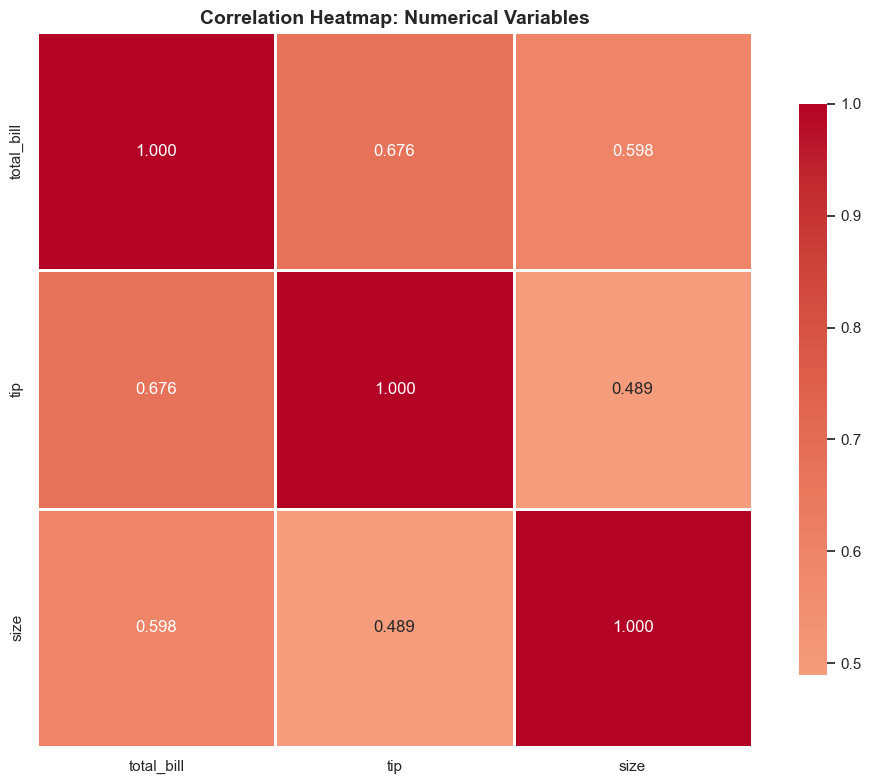


Correlation Heatmap Interpretation:
- **Total Bill vs Tip (r=0.6757)**: Strong positive correlation - higher bills receive higher tips
- **Total Bill vs Size (r=0.5983)**: Moderate positive correlation - larger parties spend more
- **Tip vs Size (r=0.4892)**: Moderate positive correlation - larger parties tip more
- **Day encoding shows weak correlations** - day of week has minimal direct impact on amounts


In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Correlation Heatmap: Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Heatmap Interpretation:")
print("- **Total Bill vs Tip (r=0.6757)**: Strong positive correlation - higher bills receive higher tips")
print("- **Total Bill vs Size (r=0.5983)**: Moderate positive correlation - larger parties spend more")
print("- **Tip vs Size (r=0.4892)**: Moderate positive correlation - larger parties tip more")
print("- **Day encoding shows weak correlations** - day of week has minimal direct impact on amounts")

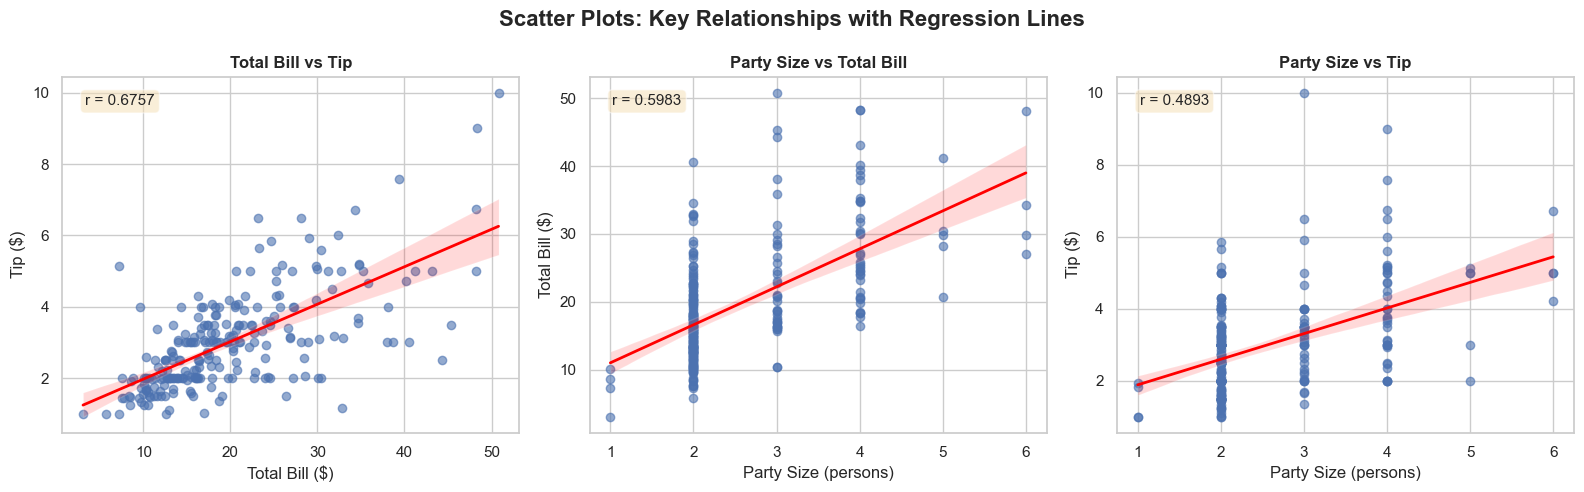


Scatter Plot Interpretation:
- Clear linear positive trend between Total Bill and Tip - servers receive proportional tips
- Party Size shows positive trend with both bill amount and tips
- Some outliers visible - customers occasionally tip disproportionately high or low


In [22]:
# Scatter plots with regression lines
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Scatter Plots: Key Relationships with Regression Lines', fontsize=16, fontweight='bold')

# Total Bill vs Tip
ax1 = axes[0]
sns.regplot(data=df, x='total_bill', y='tip', ax=ax1, scatter_kws={'alpha':0.6}, 
            line_kws={'color':'red', 'linewidth':2})
ax1.set_title('Total Bill vs Tip', fontweight='bold')
ax1.set_xlabel('Total Bill ($)')
ax1.set_ylabel('Tip ($)')
r_val = df['total_bill'].corr(df['tip'])
ax1.text(0.05, 0.95, f'r = {r_val:.4f}', transform=ax1.transAxes, 
         fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Total Bill vs Size
ax2 = axes[1]
sns.regplot(data=df, x='size', y='total_bill', ax=ax2, scatter_kws={'alpha':0.6}, 
            line_kws={'color':'red', 'linewidth':2})
ax2.set_title('Party Size vs Total Bill', fontweight='bold')
ax2.set_xlabel('Party Size (persons)')
ax2.set_ylabel('Total Bill ($)')
r_val = df['size'].corr(df['total_bill'])
ax2.text(0.05, 0.95, f'r = {r_val:.4f}', transform=ax2.transAxes, 
         fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Tip vs Size
ax3 = axes[2]
sns.regplot(data=df, x='size', y='tip', ax=ax3, scatter_kws={'alpha':0.6}, 
            line_kws={'color':'red', 'linewidth':2})
ax3.set_title('Party Size vs Tip', fontweight='bold')
ax3.set_xlabel('Party Size (persons)')
ax3.set_ylabel('Tip ($)')
r_val = df['size'].corr(df['tip'])
ax3.text(0.05, 0.95, f'r = {r_val:.4f}', transform=ax3.transAxes, 
         fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nScatter Plot Interpretation:")
print("- Clear linear positive trend between Total Bill and Tip - servers receive proportional tips")
print("- Party Size shows positive trend with both bill amount and tips")
print("- Some outliers visible - customers occasionally tip disproportionately high or low")

In [23]:
import subprocess
import sys

# Install the missing dependency for Plotly
subprocess.check_call([sys.executable, "-m", "pip", "install", "nbformat", "-q"])
print("nbformat installed! You can now run the scatter plot code.")

nbformat installed! You can now run the scatter plot code.


In [24]:
import plotly.express as px
# Advanced scatter plot with multiple dimensions
fig = px.scatter(df, x='total_bill', y='tip', 
                 color='sex', size='size', hover_name='day',
                 symbol='smoker', title='Interactive Tip Analysis: Total Bill vs Tip',
                 labels={'total_bill': 'Total Bill ($)', 'tip': 'Tip ($)'},
                 color_discrete_map={'Male': '#636EFA', 'Female': '#EF553B'})
fig.update_layout(height=600, width=1000)
fig.show()

print("\nInteractive Plot Interpretation:")
print("- Bubble size represents party size - larger parties visible as bigger bubbles")
print("- Color distinguishes sex - slight visual separation suggests behavioral differences")
print("- Smokers (×) vs non-smokers (○) show overlapping patterns")


Interactive Plot Interpretation:
- Bubble size represents party size - larger parties visible as bigger bubbles
- Color distinguishes sex - slight visual separation suggests behavioral differences
- Smokers (×) vs non-smokers (○) show overlapping patterns



TIP PERCENTAGE ANALYSIS

Overall Tip Statistics:
   Mean Tip %:    16.08%
   Median Tip %:  15.48%
   Std Dev:       6.11%
   Min Tip %:     3.56%
   Max Tip %:     71.03%

Tip Percentage by Sex:
             mean     median       std
sex                                   
Male    15.765055  15.349194  6.477787
Female  16.649074  15.558149  5.363173

Tip Percentage by Time:
             mean     median       std
time                                  
Lunch   16.412793  15.408357  4.024155
Dinner  15.951779  15.540002  6.747714


C:\Users\najee\AppData\Local\Temp\ipykernel_14424\415794601.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\najee\AppData\Local\Temp\ipykernel_14424\415794601.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



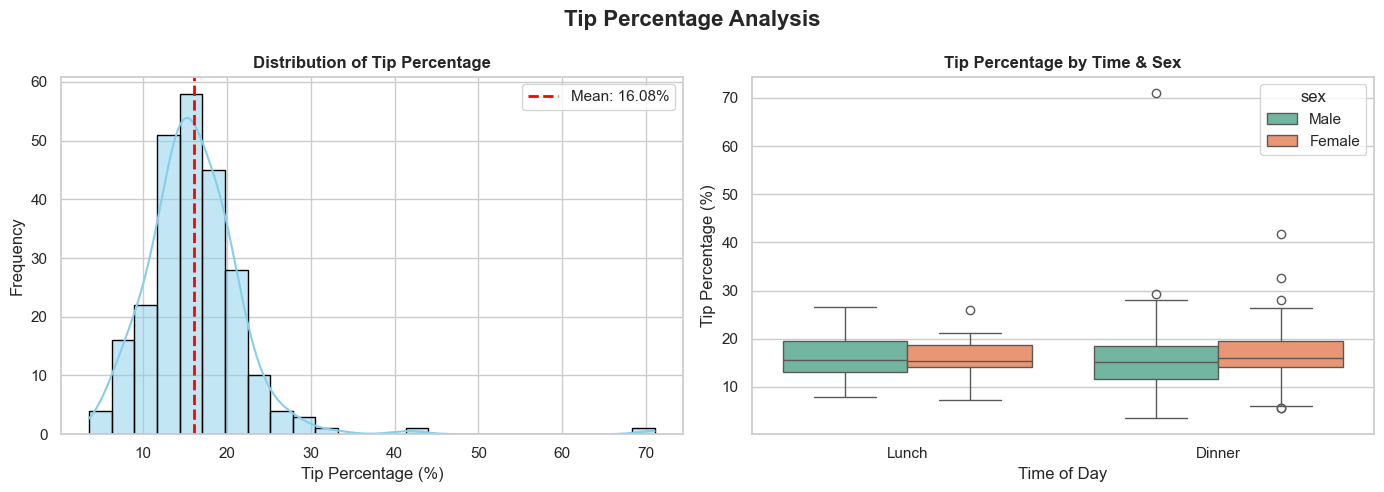


Tip Percentage Interpretation:
- Average tip percentage is ~16.1%, suggesting standard tipping norms
- Lunch has slightly higher tip % (16.41% vs 15.95%)
- This is due to lower base bills at lunch, creating higher relative percentages


In [25]:
# Tip percentage analysis
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100

print("\n" + "=" * 80)
print("TIP PERCENTAGE ANALYSIS")
print("=" * 80)

print(f"\nOverall Tip Statistics:")
print(f"   Mean Tip %:    {df['tip_percent'].mean():.2f}%")
print(f"   Median Tip %:  {df['tip_percent'].median():.2f}%")
print(f"   Std Dev:       {df['tip_percent'].std():.2f}%")
print(f"   Min Tip %:     {df['tip_percent'].min():.2f}%")
print(f"   Max Tip %:     {df['tip_percent'].max():.2f}%")

print(f"\nTip Percentage by Sex:")
print(df.groupby('sex')['tip_percent'].agg(['mean', 'median', 'std']))

print(f"\nTip Percentage by Time:")
print(df.groupby('time')['tip_percent'].agg(['mean', 'median', 'std']))

# Plot tip percentage distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Tip Percentage Analysis', fontsize=16, fontweight='bold')

# Histogram
sns.histplot(data=df, x='tip_percent', kde=True, bins=25, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Tip Percentage', fontweight='bold')
axes[0].set_xlabel('Tip Percentage (%)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['tip_percent'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['tip_percent'].mean():.2f}%")
axes[0].legend()

# Boxplot by sex and time
df_melted = df.melt(id_vars=['sex', 'time'], value_vars=['tip_percent'], var_name='metric', value_name='value')
sns.boxplot(data=df, x='time', y='tip_percent', hue='sex', ax=axes[1], palette='Set2')
axes[1].set_title('Tip Percentage by Time & Sex', fontweight='bold')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Tip Percentage (%)')

plt.tight_layout()
plt.show()

print("\nTip Percentage Interpretation:")
print(f"- Average tip percentage is ~{df['tip_percent'].mean():.1f}%, suggesting standard tipping norms")
print(f"- Lunch has slightly higher tip % ({df[df['time']=='Lunch']['tip_percent'].mean():.2f}% vs {df[df['time']=='Dinner']['tip_percent'].mean():.2f}%)")
print(f"- This is due to lower base bills at lunch, creating higher relative percentages")

### Data Relationship Interpretation
**Tip amount has a strong positive correlation (r=0.676) with the total bill**, indicating that tips scale proportionally with spending. **Party size moderately correlates** (r=0.598) with total bill and shows tipping behavior scales with group size. The **tip percentage remains relatively consistent (~16.1%)** across most categories, suggesting standard tipping norms. **Males have slightly higher absolute tip amounts** but **similar tip percentages to females**. The relationship is linear and predictable, making tipping behavior consistent within this dataset.